Import modules:

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math

sns.set()
np.set_printoptions(precision=6,suppress=True)

Import dataset:

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

In [4]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [13]:
X = data.data
Y = data.target

Informations about data:

In [14]:
df_val = pd.DataFrame(data = X, columns = data.feature_names)
df_val.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [23]:
df_res = pd.DataFrame(data = Y,columns = ['Iris type'])
df_res.head(5)

,Iris type
0,0
1,0
2,0
3,0
4,0


In [29]:
df = df_val.join(df_res)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris type          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Iris type,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [32]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Iris type,0.782561,-0.426658,0.949035,0.956547,1.000000


Plot dataframe:

In [37]:
px.scatter_matrix(df,color="Iris type")

Cut from X data only first 2 rows:

In [40]:
X = X[:,:2]
print(f'(Shape of X{X.shape}')
print(f'(Shape of Y{Y.shape}')

(Shape of X(150, 2)
(Shape of Y(150,)


Plot Sepal width and lenght:

In [50]:
px.scatter(x = X[:,0],y = X[:,1],color= df['Iris type'],
           labels = {"x": 'Sepal_lenght',"y":"Sepal_width"})

Create model:

In [51]:
from sklearn.neighbors import KNeighborsClassifier 

model = KNeighborsClassifier()
model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Check accurancy of model:

In [53]:
print(f'Accurancy of model is: {model.score(X,Y):.2f}')

Accurancy of model is: 0.83


Plot result of model:

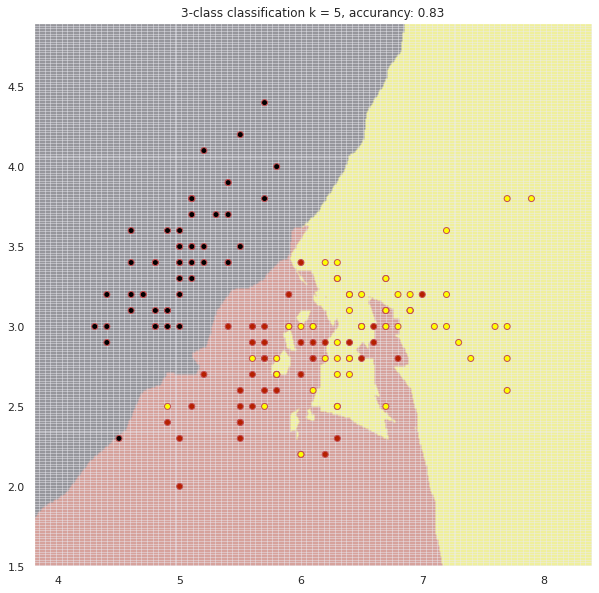

In [71]:
margin = 0.5

x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
mesh = np.c_[xx.ravel(),yy.ravel()]
Z = model.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.pcolormesh(xx,yy,Z,cmap = 'gnuplot',alpha = 0.1)
plt.scatter(X[:,0],X[:,1],c = Y,cmap = 'gnuplot',edgecolors='r')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title(f'3-class classification k = 5, accurancy: {model.score(X,Y):.2f}')
_= plt.show()

Find optimal n_neightbours:

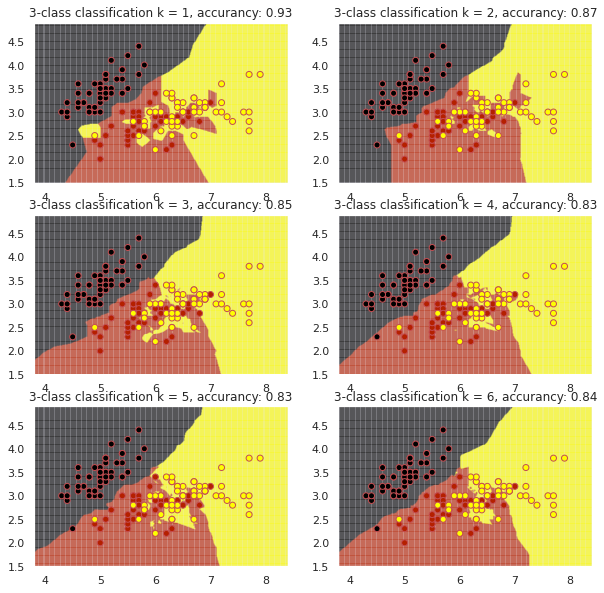

In [73]:
plt.figure(figsize=(10,10))
margin = 0.5

for i in range(1,7):
    plt.subplot(3,2,i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X,Y)

    xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
    mesh = np.c_[xx.ravel(),yy.ravel()]
    Z = model.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx,yy,Z,cmap = 'gnuplot',alpha = 0.1)
    plt.scatter(X[:,0],X[:,1],c = Y,cmap = 'gnuplot',edgecolors='r')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f'3-class classification k = {i}, accurancy: {model.score(X,Y):.2f}')

_= plt.show()

Find optimal n_neightbour by grid search:

In [76]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_neighbors':range(1,31)}

classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier,grid_params,cv = 3)
gs.fit(X,Y)


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [77]:
gs.best_params_

{'n_neighbors': 15}

Assign best classifier:

In [79]:
classifier = gs.best_estimator_
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

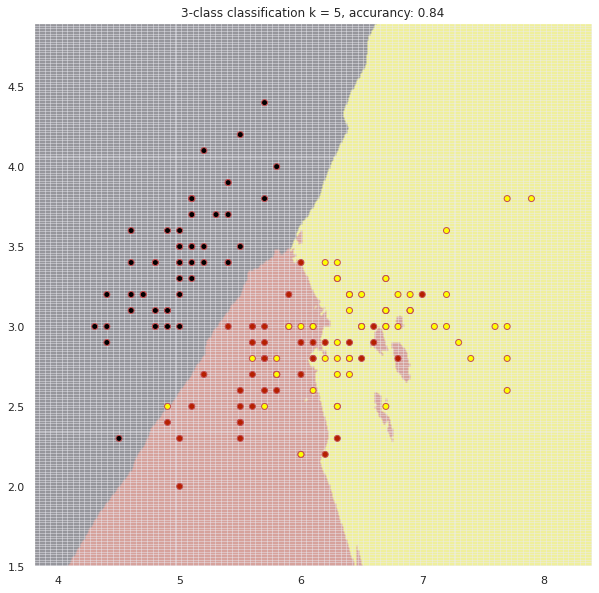

In [81]:
margin = 0.5

x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
mesh = np.c_[xx.ravel(),yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.pcolormesh(xx,yy,Z,cmap = 'gnuplot',alpha = 0.1)
plt.scatter(X[:,0],X[:,1],c = Y,cmap = 'gnuplot',edgecolors='r')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title(f'3-class classification k = 5, accurancy: {model.score(X,Y):.2f}')
_= plt.show()